# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     848.5
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.94e-40
Time:                        13:24:36   Log-Likelihood:                -1.9242
No. Observations:                  50   AIC:                             11.85
Df Residuals:                      46   BIC:                             19.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9799      0.089     55.730      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50316188  4.97695561  5.41215482  5.78181613  6.06871989  6.26819931
  6.38890721  6.45139437  6.48473311  6.52174078  6.59358798  6.72467729
  6.92863401  7.20606759  7.54447143  7.92027775  8.30272967  8.6589345
  8.95926788  9.18224103  9.31803125  9.37009579  9.35460381  9.29777988
  9.23159528  9.18851528  9.19616517  9.27279147  9.42426411  9.64311202
  9.90975059 10.19569937 10.46826133 10.69589489 10.8533961  10.92603961
 10.91199796 10.82264186 10.68067201 10.5163894  10.36271702 10.24979063
 10.20000758 10.22434697 10.32056585 10.47356767 10.65788267 10.84185244
 10.9928313  11.08254996]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.08175067 10.95075799 10.70895972 10.40053817 10.08365281  9.8162008
  9.64164174  9.57835724  9.6151505   9.71398762]


## Plot comparison

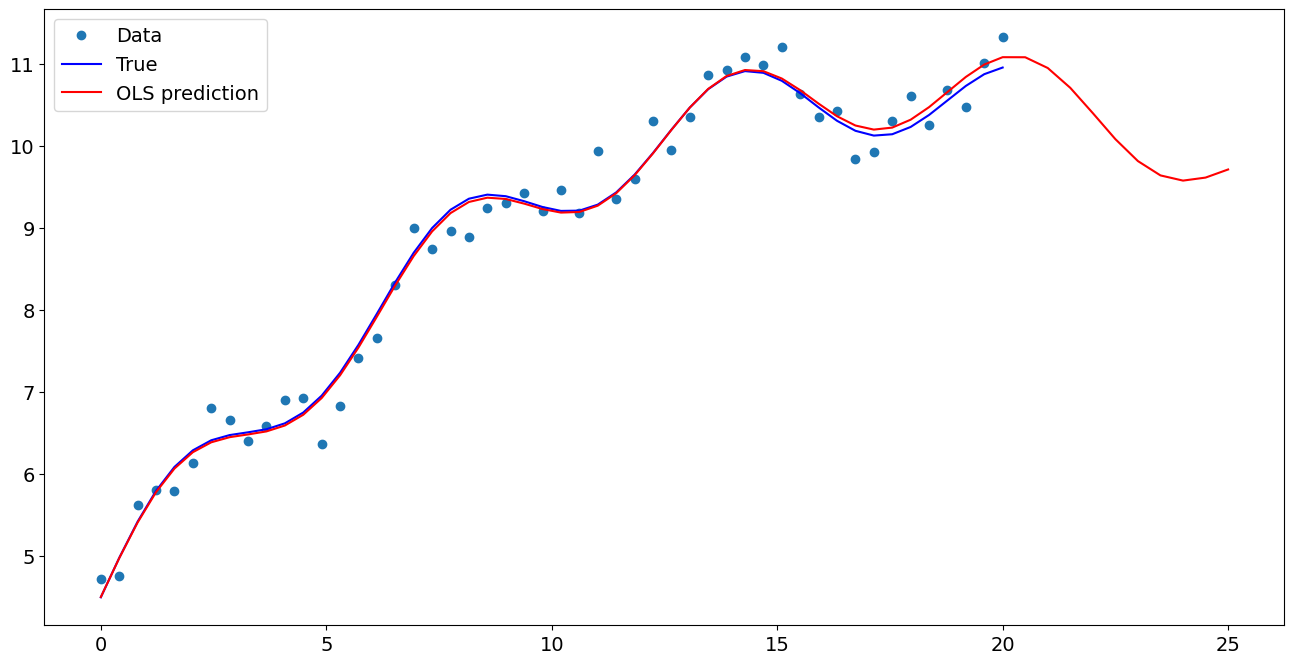

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.979921
x1                  0.497106
np.sin(x1)          0.494382
I((x1 - 5) ** 2)   -0.019070
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.081751
1    10.950758
2    10.708960
3    10.400538
4    10.083653
5     9.816201
6     9.641642
7     9.578357
8     9.615151
9     9.713988
dtype: float64